In [1]:
import qutip
import krotov

In [2]:
qutip.__version__

'4.5.2'

In [3]:
import matplotlib.pylab as plt

In [4]:
import numpy as np

In [5]:
%matplotlib inline

This example follows Goerz et al., Phys. Rev. A 90, 032329 (2014)

## Rydberg Atom States

$\newcommand{\ket}[1]{\vert#1\rangle}$

The Hilbert space for the Rydberg atom consists of the states $\ket{0}$, $\ket{1}$, $\ket{i}$ (intermediary state) and $\ket{r}$ (Rydberg state)

In [78]:
def ket(labels):
    """Eigenstate of one or more Rydberg atoms.
    
    Args:
        labels (str): labels
        
    For example, `ket('i')` describes the state |i⟩ of a single atom and
    `ket('rr')` describes the state |r⟩⊗|r⟩ of two atoms.
    """
    levels = ['0', '1', 'i', 'r']
    states = []
    N = len(levels)
    for label in str(labels):
        states.append(qutip.basis(N, levels.index(label)))
    return qutip.tensor(*states)

In [10]:
ket('00')

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [11]:
ket('0r')

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

## Hamiltonian

In [12]:
def _H0_1q(E1, Δ1, Δ2):
    return qutip.Qobj(np.diag([0, E1, Δ1, Δ2]))

In [13]:
GHz = 2 * np.pi
MHz = 1e-3 * GHz
ns = 1

In [14]:
H0_1q = _H0_1q(E1=(9.1 * GHz), Δ1=(1.273 * GHz), Δ2=0)

In [15]:
Id = qutip.identity(4)

In [16]:
def _H_int(u):
    return u * ket('rr') * ket('rr').dag()

In [17]:
H_int = _H_int(57.26 * MHz)

In [18]:
H0 = qutip.tensor(H0_1q, Id) + qutip.tensor(Id, H0_1q) + H_int

In [19]:
H0

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.          57.1769863    0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           7.9984949    0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.          57.1769863
    0.           0.           0.           0.           0.
    0

In [20]:
H_1B = ket('0') * ket('i').dag() + ket('i') * ket('0').dag()
H_1R = ket('i') * ket('r').dag() + ket('r') * ket('i').dag()

In [21]:
H_B_left = qutip.tensor(H_1B, Id)
H_B_right = qutip.tensor(Id, H_1B) 
H_R_left = qutip.tensor(H_1R, Id)
H_R_right = qutip.tensor(Id, H_1R) 

In [22]:
H_B_left

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

/Users/goerz/Desktop/ryberg_oct_test/.venv/lib/python3.8/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/goerz/Desktop/ryberg_oct_test/.venv/lib/python3.8/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


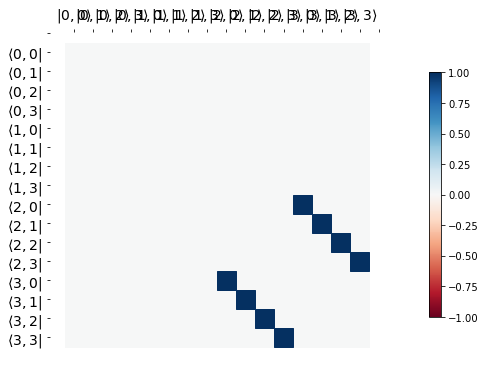

In [23]:
fig, ax = qutip.hinton(H_R_left)
#fig.set_size_inches(16, 10)

In [24]:
def pulse_zero(t, args):
    return 0.0

In [25]:
T = 800

In [26]:
tlist = np.linspace(0, T, 2000)

In [27]:
tlist

array([0.000000e+00, 4.002001e-01, 8.004002e-01, ..., 7.991996e+02,
       7.995998e+02, 8.000000e+02])

In [28]:
def Ω_B_left(t, args):
    E0 = 140 * MHz
    return (
        E0 * krotov.shapes.blackman(t, 0, 50) +
        E0 * krotov.shapes.blackman(t, T-50, T)
    )

In [29]:
def Ω_B_right(t, args):
    E0 = 55 * MHz
    return E0 * krotov.shapes.blackman(t, 0, T)

In [30]:
Ω_R_left = Ω_B_left
Ω_R_right = Ω_B_right

In [31]:
def plot_pulse(func, tlist, args=None, unit='MHz'):
    fig, ax = plt.subplots()
    vals = np.array([func(t, args) for t in tlist])
    if unit == 'MHz':
        vals /= MHz
    elif unit == 'GHz':
        vals /= GHz
    else:
        raise ValueError("Invalid unit")
    ax.plot(tlist, vals, label=func.__name__)
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('amplitude (%s)' % unit)
    ax.legend()
    return fig, ax

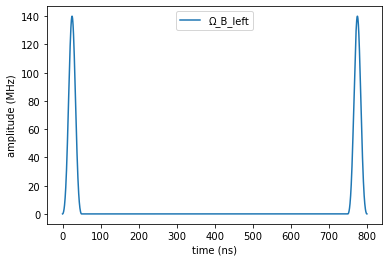

In [32]:
plot_pulse(Ω_B_left, tlist);

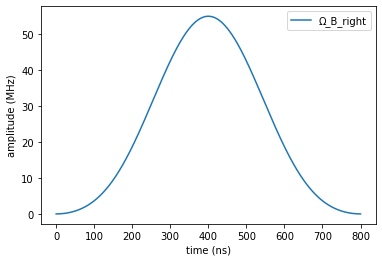

In [33]:
plot_pulse(Ω_B_right, tlist);

In [34]:
H = [H0, [H_B_left, Ω_B_left], [H_B_right, Ω_B_right], [H_R_left, Ω_R_left], [H_R_right, Ω_R_left]] 

## Propagation

In [35]:
res = qutip.mesolve(H, ket('00'), tlist)

In [36]:
def amplitude(state, level):
    return complex((ket(level).dag() * state).full())

In [37]:
def phase(state, level):
    a = amplitude(state, level)
    return np.angle(a)

In [38]:
def pop(state, level):
    a = amplitude(state, level)
    return abs(a)**2

In [39]:
def pops(res, level):
    return np.array([pop(state, level) for state in res.states])

In [40]:
def phases(res, level):
    return np.array([phase(state, level) for state in res.states])

In [41]:
def plot_pops(res, labels):
    fig, ax = plt.subplots()
    for label in labels:
        ax.plot(res.times, pops(res, label), label=label)
    ax.legend()
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('population')
    return fig, ax

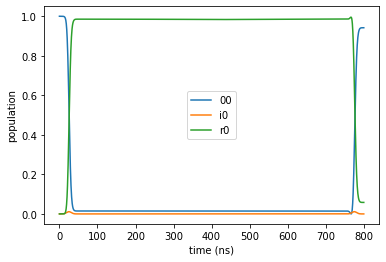

In [42]:
plot_pops(res, ['00', 'i0', 'r0']);

In [43]:
def plot_phases(res, labels):
    fig, ax = plt.subplots()
    for label in labels:
        ϕ = phases(res, label) / np.pi
        ax.plot(res.times, ϕ, label=label)
    ax.legend()
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('phase (π)')
    return fig, ax

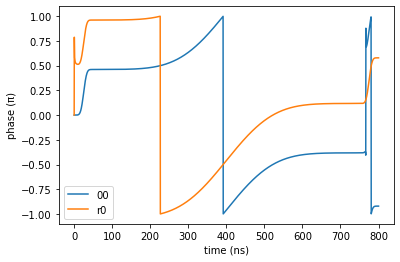

In [44]:
plot_phases(res, ['00', 'r0']);

## Gate

In [45]:
def propagate(label, H, tlist):
    """Propagate the state (by label) and return the resulting state at T."""
    psi0 = ket(label)
    return qutip.mesolve(H, psi0, tlist).states[-1]

In [8]:
krotov.parallelization.set_parallelization(use_loky=True)

In [46]:
prop_states = krotov.parallelization.parallel_map(
    propagate, ['00', '01', '10', '11'], task_kwargs=dict(H=H, tlist=tlist),
    progress_bar=True
)

25.0%. Run time:  57.40s. Est. time left: 00:00:02:52
50.0%. Run time: 151.18s. Est. time left: 00:00:02:31
75.0%. Run time: 152.04s. Est. time left: 00:00:00:50
100.0%. Run time: 230.05s. Est. time left: 00:00:00:00
Total run time: 230.26s


In [48]:
basis_states = [ket(label) for label in ('00', '01', '10', '11')]

In [61]:
U = krotov.functionals.gate(basis_states, prop_states)

In [75]:
U

Quantum object: dims = [[4, 4], [4, 4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.94072226-0.23841663j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.91231219-0.33092939j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.94958281-0.31351424j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.97265433-0.23225751j]]

In [62]:
def pop_loss(U):
    """Loss of population from the logical subspace."""
    return 1 - (U.dag() * U).tr() / 4.0

In [63]:
pop_loss(U)

0.029093164678247296

In [67]:
def closest_unitary(U):
    V, Σ, Wdag = np.linalg.svd(U.full())
    return qutip.Qobj(V @ Wdag)

In [69]:
Uu = closest_unitary(U)

In [76]:
Uu

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.96935282-0.24567276j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.94006466-0.34099624j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.94958343-0.31351444j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.97265433-0.23225751j]]

In [73]:
def diag_concurrence(U):
    """Calculate the concurrence for a diagonal unitary U."""
    ϕ00, ϕ01, ϕ10, ϕ11 = np.angle(np.diag(U.full()))
    γ = ϕ00 - ϕ01 - ϕ10 + ϕ11
    return np.abs(np.sin(γ/2))

In [74]:
diag_concurrence(Uu)

0.021448493124935932